Create three models with Random Forest Classifier.

1. Using existing features

2. Add clusters using only numeric variables and repeat classification. Use elbow curve for correct number of K.

3. Use upsampling on the original dataset for creating model. 

Comment on the results.  


In [31]:
# data manipulation and summary statistics
import numpy as np
import pandas as pd


# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from IPython.display import clear_output


# data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler

# classification
from sklearn.ensemble import RandomForestClassifier


# Model tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# accuracy metrics
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.evaluate import confusion_matrix


# other
import sys
import warnings
from time import sleep

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [ ]:
## reading from colab
from google.colab import files    
uploaded = files.upload()

Saving MARKETING_FINANCE_Bank_targeting_default.csv to MARKETING_FINANCE_Bank_targeting_default.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['MARKETING_FINANCE_Bank_targeting_default.csv']))

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp_var_rate    4119 non-null   float64
 16  cons_price_idx  4119 non-null   float64
 17  cons_conf_idx   4119 non-null   f

In [ ]:
print(df.describe(include="all")) 


In [57]:
df.head(2)
df.y.value_counts()

0    3668
1     451
Name: y, dtype: int64

In [16]:
df.poutcome.value_counts()

nonexistent    3523
failure         454
success         142
Name: poutcome, dtype: int64

# Model

In [11]:
target = df['y']
X = df.drop(columns=['y'])
X.head()
target

0       0
1       0
2       0
3       0
4       0
       ..
4114    0
4115    0
4116    0
4117    0
4118    0
Name: y, Length: 4119, dtype: int64

In [17]:
X = pd.get_dummies(X, columns=["job", "marital", "education", "default", "housing", "loan","contact","month","day_of_week","poutcome"])

In [18]:
train_x, test_x, train_y, test_y = train_test_split(
    X, target, test_size=0.25, random_state=42)
print(
    f"Number of observations \n Train set: {len(train_x)}\n Test set: {len(test_x)}")

Number of observations 
 Train set: 3089
 Test set: 1030


In [21]:
sc= StandardScaler()
train_x = sc. fit(train_x).transform(train_x)

In [22]:
test_x = sc.transform(test_x)

In [23]:
# # Define the parameter grid for the grid search
# param_grid = {
#     'max_depth': np.arange(1, 25),
#     'min_samples_split': [2, 5, 6, 7, 8, 10],
#     'min_samples_leaf': [1, 2, 3, 4]
# }

In [26]:
# Perform grid search to find the best hyperparameters for the model
rf = RandomForestClassifier()
rf.fit(train_x, train_y)

RandomForestClassifier()

In [27]:
y_pred = rf.predict(test_x)

In [29]:
accuracy = accuracy_score(test_y, y_pred)
print("Accuracy:", accuracy)  # 0.9067961165048544 acc score

Accuracy: 0.9067961165048544


# 2. Using clusters




In [59]:
target = df['y']
X = df.drop(columns=['y'])
X = X.select_dtypes(include='number')
print(y)
print(X.head(2))

[2 0 0 ... 3 2 3]
   age  duration  campaign  pdays  previous  emp_var_rate  cons_price_idx  \
0   30       487         2      0         0          -1.8          92.893   
1   39       346         4      0         0           1.1          93.994   

   cons_conf_idx  euribor3m  nr_employed  
0          -46.2      1.313       5099.1  
1          -36.4      4.855       5191.0  


In [60]:
wcss = []

for cluster in range(1,11):
    kmeans = KMeans(n_clusters = cluster, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

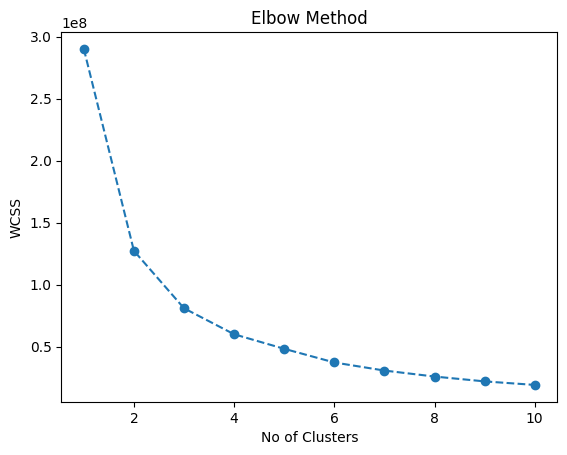

In [61]:
plt.plot(range(1,11), wcss, 'o--')
plt.title('Elbow Method')
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')

plt.show()

# let's choose k=4

In [62]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y = kmeans.fit_predict(X)
y

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 3, 3, ..., 0, 1, 0], dtype=int32)

In [63]:
X['Cluster'] = kmeans.labels_
X.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,Cluster
0,30,487,2,0,0,-1.8,92.893,-46.2,1.313,5099.1,1
1,39,346,4,0,0,1.1,93.994,-36.4,4.855,5191.0,3
2,25,227,1,0,0,1.4,94.465,-41.8,4.962,5228.1,3
3,38,17,3,0,0,1.4,94.465,-41.8,4.959,5228.1,0
4,47,58,1,0,0,-0.1,93.200,-42.0,4.191,5195.8,0


In [64]:
train_x, test_x, train_y, test_y = train_test_split(
    X, target, test_size=0.25, random_state=42)
print(
    f"Number of observations \n Train set: {len(train_x)}\n Test set: {len(test_x)}")

Number of observations 
 Train set: 3089
 Test set: 1030


In [65]:
sc= StandardScaler()
train_x = sc. fit(train_x).transform(train_x)

In [66]:
test_x = sc.transform(test_x)

In [67]:
# Perform grid search to find the best hyperparameters for the model
rf2 = RandomForestClassifier()
rf2.fit(train_x, train_y)

RandomForestClassifier()

In [68]:
y_pred2 = rf2.predict(test_x)

In [69]:
accuracy = accuracy_score(test_y, y_pred2)
print("Accuracy:", accuracy)  #  0.9 acc score

Accuracy: 0.9


# PART 3
